In [213]:
# K-Means
# rnk, muk(random) =>  Parameter , K => Hyperparameter
# data = point = instans => random(N)
from random import randrange

K = 3
N = 100 # [[?,?], [], []]
colorMap = ["r","g","b","k"]

centroid = list()
for _ in range(K) :
    centroid.append([randrange(1,100),randrange(1,100)])
    
data = list()
for i in range(N) :
    data.append([randrange(1,100),randrange(1,100)])
    

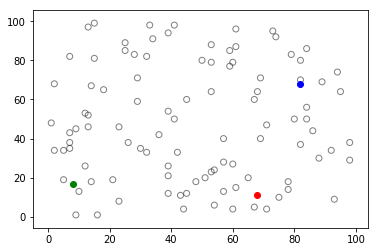

In [214]:
import matplotlib.pyplot as plt

for _ in data :
    plt.scatter(_[0], _[1], facecolor="none", alpha=0.5, edgecolor = colorMap[-1]  )

for i, _ in enumerate(centroid) :
    plt.scatter(_[0], _[1], color = colorMap[i] )
    
plt.show()

In [215]:
from math import sqrt

def distance(x1, x2) :
    _sum  = 0
    for i in range(len(x1)) :
        _sum += (x1[i]-x2[i])**2
    return sqrt(_sum)

def angle(x1, x2) :
    _innerProduct = 0
    for i in range(len(x1)) :
        _innerProduct += x1[i]*x2
    x1VecLength = distance(x1,[0 for _ in range(len(x1))])
    x2VecLength = distance(x1,[0 for _ in range(len(x1))])
    return _innerProduct/(x1VecLength*x2VecLength)


# DISTANCE/ANGLE

In [216]:
# EM algorithm
# E-Expertation = rnk assignement => distance
# M-Maximization = centroid update
def expectation(x, c , opt=False) :
    candidates = list()
    nearest = distance if not opt else angle
    best = min if not opt else max
    
    for _ in c:
        candidates.append(nearest(x,_))
    return candidates.index(best(candidates))


In [217]:
def maximization(X) :
    _sum = [ 0 for _ in range(len(X[0]))]
    D = len(X)
    for x in X :
        for i in range(len(x)) :
            _sum[i] += x[i]
    return [ _/D for _ in _sum]


In [218]:
def sse(X, c , opt=False) :
    error = 0
    nearest = distance if not opt else angle
    for x in X :
        error += nearest(x,c )
    return error

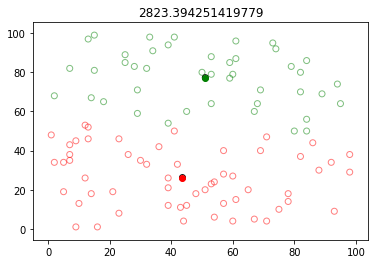

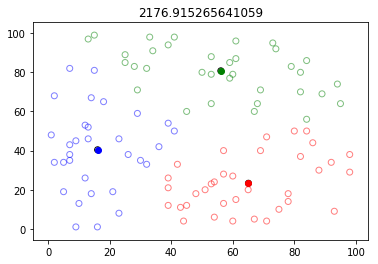

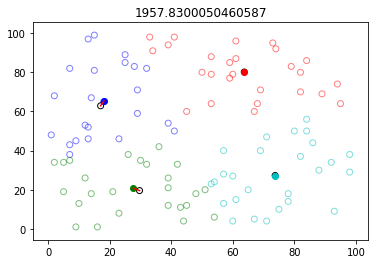

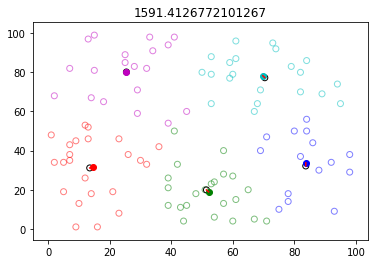

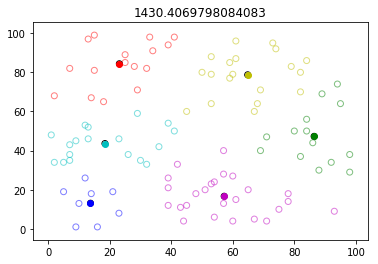

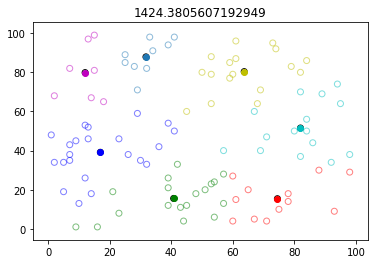

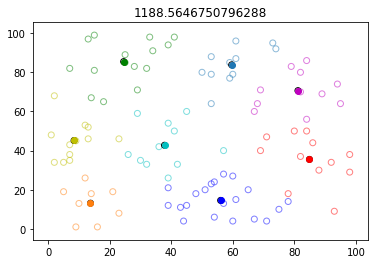

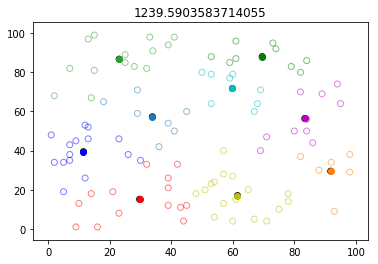

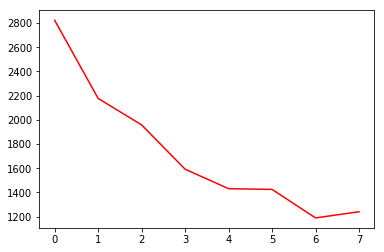

In [219]:
# X0 => [0,0,0]
# X1 ,
# X2 , ...
errorRate = list()
colorMap = ["r","g","b","c","m","y","C0","C1","C2","k"]

for K in range(2,10) :
    centroid = list()

    for _ in range(K) :
        centroid.append([randrange(1,100), randrange(1,100)])
    
    for _ in range(10) :

        rnk = list(list( 0 for _ in range(K)) for _ in range(N))

        for i in range(N) :
            j = expectation(data[i],centroid)
            rnk[i][j] = 1

        _sse = 0
        oldCentroid = list()

        for k in range(K) :
            X = [data[i] for i in range(N) if rnk[i][k]]
            _sse += sse(X, centroid[k])
            oldCentroid.append(centroid[k])
            #print(centroid[k])
            centroid[k] = maximization(X)
            #print(centroid[k])
            #print()
    errorRate.append(_sse)

    for i in range(N) :
        plt.scatter(data[i][0], data[i][1], facecolor="none", alpha=0.5, edgecolor = colorMap[rnk[i].index(max(rnk[i]))] )

    for i, _ in enumerate(centroid) :
        plt.plot( (oldCentroid[i][0],_[0]), (oldCentroid[i][1],_[1]), "r-" )
        plt.scatter(oldCentroid[i][0], oldCentroid[i][1], edgecolors="k", facecolor="none", color = colorMap[i] )
        plt.scatter(_[0], _[1], color = colorMap[i] )

    plt.title(_sse)
    plt.show()
    
plt.plot(range(len(errorRate)), errorRate, "r-")
plt.show()

In [220]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "merley has the best squooshy kitten belly.",
    "Google Translate app is incredible.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.",
    "Climbing ninja cat.",
    "Impressed with google map feedback.",
    "Key promoter extension for Goole Chrome."
]

#documents


In [221]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict
import re

# DTM -> TDM -> TWM
DTM = defaultdict(lambda:defaultdict(int))

for i, d  in enumerate(documents):
    for t in word_tokenize(d.lower()) :
        if t not in stopwords.words("english") and not re.search(r"[%s]" % re.escape(punctuation), t) :
            DTM[i][t] += 1
  
#DTM

In [222]:
TDM = defaultdict(lambda:defaultdict(int))
for d, termList in DTM.items() :
    for t, f in termList.items() :
        TDM[t][d] = f

#TDM

In [223]:
# TF*IDF
# TF = freq (i,j) / max freq(j) => j번째 문서에서 나온, i번째 빈도를 freq(i,j)
# freq(i,j) => TDM[단어][문서:빈도], max freq => DTM[문서] max([단어:빈도])
# IDF = log N / df(i) => i번째 단어의 문서빈도 df(i), N => 전체 문서 수
# df => len(TDM[단어]), n => len(DTM)

In [224]:
from math import log2

TWM = defaultdict(lambda:defaultdict(float))
N = len(DTM)

for term, docList in TDM.items() :
    
    df = len(docList)
    
    for d, f in docList.items() :
        maxFreq = max(DTM[d].values())
        TF = f/maxFreq
        IDF = log2(N/df)
        
        TWM[term][d] = TF*IDF
#TWM[단어][문서:가중치, ...]


In [225]:
#TWM => 단어-문서:가중치, .....
#단어 -> concept(자원 축), 문서 -> BoW[단어,단어]


In [226]:
docVectorList = [[ 0 for _ in range(len(TDM))] for _ in range(N)]
D = list(DTM.keys())
V = list(TDM.keys())

for t, docList in TWM.items() :
    for d, w in docList.items() :
        docVectorList[D.index(d)][V.index(t)] = w

In [227]:
print(docVectorList[0])
print(D[0], V[:6])

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 ['little', 'kitty', 'came', 'play', 'eating', 'restaurant']


In [228]:
len(docVectorList), len(documents), len(docVectorList[0]), len(TDM)

(8, 8, 35, 35)

In [229]:
# K :
# _iter :

K = 2
centroid = [[randrange(0,4) for _ in range(len(V))] for _ in range(K)]
_iter = 10
sseList = list()
            
for _ in range(_iter) :
    rnk = list(list( 0 for _ in range(K)) for _ in range(len(D)))
    for i , x in enumerate(docVectorList) :
        idx = expectation(x, centroid)
        rnk[i][idx] = 1
    _sum = 0.0
                                           
    for k in range(K) :
        _X = [docVectorList[i] for i in range(len(D)) if rnk[i][k]]
        _sum += sse(_X, centroid[k])
        centroid[k] = maximization(_X)
    
    sseList.append(_sum)
    

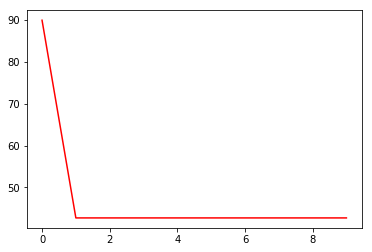

In [230]:
plt.plot(range(_iter), sseList,"r-")
plt.show()

In [231]:
for k in range(K) :
    _X = [ i for i in range(len(D)) if rnk[i][k]]
    print("Cluster : ", k)
    for x in _X :
        print(documents[x])

Cluster :  0
This little kitty came to play when I was eating at a restaurant.
merley has the best squooshy kitten belly.
Climbing ninja cat.
Cluster :  1
Google Translate app is incredible.
If you open 100 tab in google you get a smiley face.
Best cat photo I've ever taken.
Impressed with google map feedback.
Key promoter extension for Goole Chrome.


In [232]:
result = list()

for k in range(K) :
    W = [(V[i],centroid[k][i]) for i in range(len(V)) if centroid[k][i] ]
    #print([ {V[i]:centroid[k][i]} for i in range(len(V)) if centroid[k][i]])
    result.append(sorted(W, key=lambda x:x[1], reverse=True )[:5])
    print(sorted(W, key=lambda x:x[1] , reverse=True)[:5] )
    

[('little', 1.0), ('kitty', 1.0), ('came', 1.0), ('play', 1.0), ('eating', 1.0)]
[('google', 0.8490224995673061), ('translate', 0.6), ('app', 0.6), ('incredible', 0.6), ('open', 0.6)]


In [236]:
from wordcloud import WordCloud

data = { x[0]:x[1] for x in result[1]}
wc = WordCloud(background_color = "white")
wc.generate_from_frequencies(data)
wc.to_image()

#내 데이터(한글)에서 토픽 찾기
# V = len(distinct: 갶[len(V)] => 명사(2음절)
# K = 6
# => 토픽:적절한 설명
data

{'google': 0.8490224995673061,
 'translate': 0.6,
 'app': 0.6,
 'incredible': 0.6,
 'open': 0.6}

In [234]:
from random import sample
len(sample(docVectorList, K))

2